In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
lines1 = pd.read_csv("../data/the-office_lines.csv")
lines1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58721 entries, 0 to 58720
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      58721 non-null  int64 
 1   Character       58721 non-null  object
 2   Line            58721 non-null  object
 3   Season          58721 non-null  int64 
 4   Episode_Number  58721 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ MB


In [37]:
episodios2 = pd.read_csv("../data/the_office_imdb.csv")
episodios2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             188 non-null    int64  
 1   episode_num        188 non-null    int64  
 2   title              188 non-null    object 
 3   original_air_date  188 non-null    object 
 4   imdb_rating        188 non-null    float64
 5   total_votes        188 non-null    int64  
 6   desc               188 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 10.4+ KB


In [38]:
lines2 = pd.read_csv("../data/The-Office-Lines-V4.csv")
scenes = lines2[['season', 'episode', 'title', 'scene', 'speaker']]
episodes = episodios2[['season', 'title', 'imdb_rating']]

In [39]:
episodes = episodios2[['season', 'title', 'imdb_rating']]

In [43]:
# número de lineas de Dwight en el episodio
dwight_lines = lines2[lines2['speaker'] == 'Dwight'].groupby(['season', 'title']).size().reset_index(name='dwight_line_count')


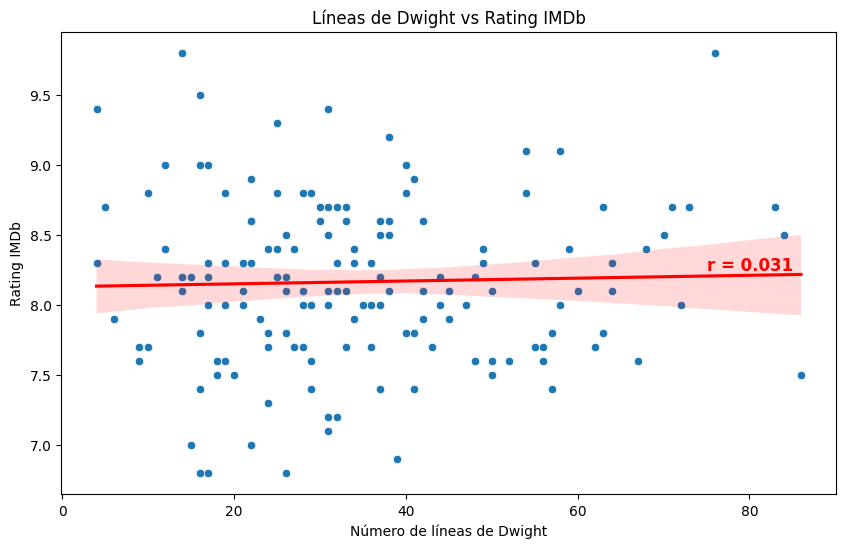

Correlation coefficient: 0.031


In [44]:

# juntar con los ratings
merged_df = pd.merge(dwight_lines, episodes, on=['season', 'title'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='dwight_line_count', y='imdb_rating')
sns.regplot(data=merged_df, x='dwight_line_count', y='imdb_rating',
            scatter=False, color='red')

plt.text(75, 8.25, f'r = {correlation:.3f}',
         fontsize=12, color='red', weight='bold')

plt.title('Líneas de Dwight vs Rating IMDb')
plt.xlabel('Número de líneas de Dwight')
plt.ylabel('Rating IMDb')
plt.show()

# Calculate correlation
correlation = merged_df['dwight_line_count'].corr(merged_df['imdb_rating'])
print(f"Correlation coefficient: {correlation:.3f}")
